In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

**The data set includes information about:**

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [7]:
df["TotalCharges"].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [8]:
df["TotalCharges"] = df["TotalCharges"].replace(" ",np.nan, regex = True)

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])

df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].mean())

In [9]:
df["TotalCharges"].value_counts()

2283.300441    11
20.200000      11
19.750000       9
20.050000       8
19.900000       8
               ..
6849.400000     1
692.350000      1
130.150000      1
3211.900000     1
6844.500000     1
Name: TotalCharges, Length: 6531, dtype: int64

No     5174
Yes    1869
Name: Churn, dtype: int64

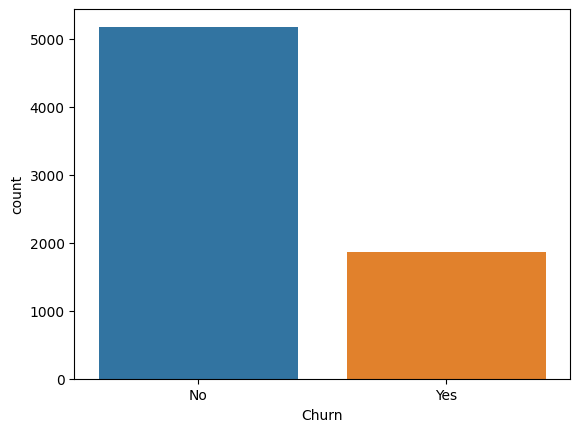

In [10]:
sns.countplot(df, x = "Churn")
df["Churn"].value_counts()

In [11]:
df.drop("customerID", axis = 1, inplace = True )

In [12]:
df.duplicated().sum()

22

In [13]:
df = df.drop_duplicates(keep = "first")

In [14]:
cat_col = df.dtypes == object
list_cat_col = df.columns[cat_col].tolist()
list_cat_col

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [15]:
df["PaymentMethod"].value_counts()

Electronic check             2359
Mailed check                 1596
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [16]:
df["gender"] = df["gender"].replace({"Male": 1, "Female":2})

df["Partner"] = df["Partner"].replace({"No": 1, "Yes":2})

df["Dependents"] = df["Dependents"].replace({"No": 1, "Yes":2})

df["PhoneService"] = df["PhoneService"].replace({"No": 1, "Yes":2})

df["MultipleLines"] = df["MultipleLines"].replace({"No": 1, "Yes":2, "No phone service":3})

df["InternetService"] = df["InternetService"].replace({"No": 1, "DSL":2, "Fiber optic":3})

df["OnlineSecurity"] = df["OnlineSecurity"].replace({"No": 1, "Yes":2, "No internet service":3})

df["OnlineBackup"] = df["OnlineBackup"].replace({"No": 1, "Yes":2, "No internet service":3})

df["DeviceProtection"] = df["DeviceProtection"].replace({"No": 1, "Yes":2, "No internet service":3})

df["TechSupport"] = df["TechSupport"].replace({"No": 1, "Yes":2, "No internet service":3})

df["StreamingTV"] = df["StreamingTV"].replace({"No": 1, "Yes":2, "No internet service":3})

df["StreamingMovies"] = df["StreamingMovies"].replace({"No": 1, "Yes":2, "No internet service":3})

df["Contract"] = df["Contract"].replace({"Month-to-month": 1, "Two year":2, "One year":3})

df["PaperlessBilling"] = df["PaperlessBilling"].replace({"No": 1, "Yes":2})

df["PaymentMethod"] = df["PaymentMethod"].replace({"Electronic check": 1, "Mailed check":2, "Bank transfer (automatic)":3, "Credit card (automatic)":4})

df["Churn"] = df["Churn"].replace({"No": 1, "Yes":2})

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   int64  
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   int64  
 3   Dependents        7021 non-null   int64  
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   int64  
 6   MultipleLines     7021 non-null   int64  
 7   InternetService   7021 non-null   int64  
 8   OnlineSecurity    7021 non-null   int64  
 9   OnlineBackup      7021 non-null   int64  
 10  DeviceProtection  7021 non-null   int64  
 11  TechSupport       7021 non-null   int64  
 12  StreamingTV       7021 non-null   int64  
 13  StreamingMovies   7021 non-null   int64  
 14  Contract          7021 non-null   int64  
 15  PaperlessBilling  7021 non-null   int64  
 16  PaymentMethod     7021 non-null   int64  


<AxesSubplot: >

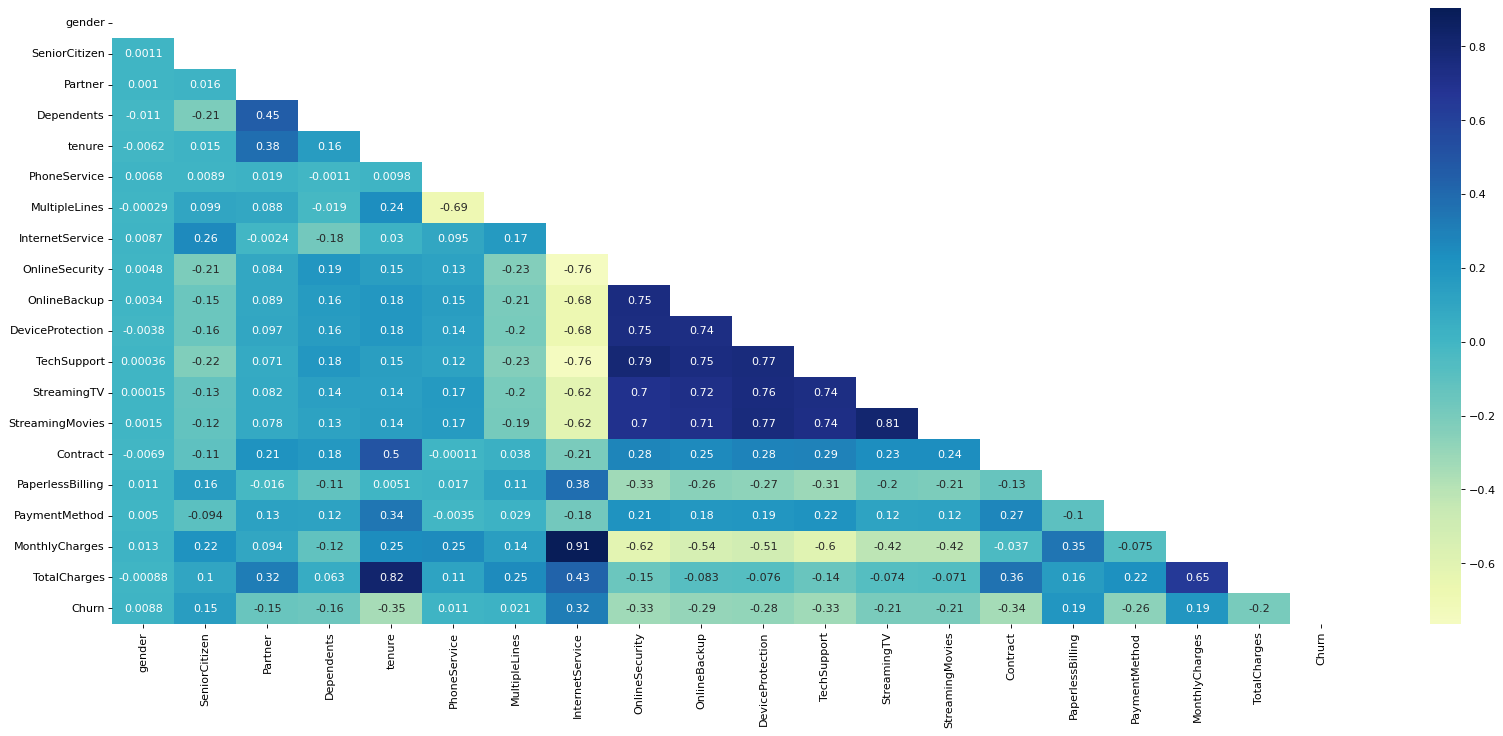

In [18]:
mask = np.triu(np.ones_like(df.corr()))
fig, ax = plt.subplots(figsize=(25,10),dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(df.corr(), mask= mask, cmap="YlGnBu", annot = True, center = 0,annot_kws={"fontsize":10})

In [19]:
df.corr()["Churn"].sort_values(ascending = False)

Churn               1.000000
InternetService     0.317464
MonthlyCharges      0.194508
PaperlessBilling    0.190891
SeniorCitizen       0.151619
MultipleLines       0.021373
PhoneService        0.011323
gender              0.008763
Partner            -0.149135
Dependents         -0.163459
TotalCharges       -0.198303
StreamingTV        -0.205022
StreamingMovies    -0.206533
PaymentMethod      -0.261892
DeviceProtection   -0.281312
OnlineBackup       -0.291349
TechSupport        -0.330149
OnlineSecurity     -0.333144
Contract           -0.341124
tenure             -0.351508
Name: Churn, dtype: float64

In [20]:
x = df.drop(columns = ["Churn"])
y = df["Churn"]

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 40)

In [22]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,2,0,2,1,1,1,3,2,1,2,1,1,1,1,1,2,1,29.85,29.85,1
1,1,0,1,1,34,2,1,2,2,1,2,1,1,1,3,1,2,56.95,1889.50,1
2,1,0,1,1,2,2,1,2,2,2,1,1,1,1,1,2,2,53.85,108.15,2
3,1,0,1,1,45,1,3,2,2,1,2,2,1,1,3,1,3,42.30,1840.75,1
4,2,0,1,1,2,2,1,3,1,1,1,1,1,1,1,2,1,70.70,151.65,2


In [23]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

/tmp/ipykernel_21/3330901477.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(frame[feature], color= color)
/tmp/ipykernel_21/3330901477.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(frame[feature], color= color)
/tmp/ipykernel_21/3330901477.py:4: UserWarning: 

`distplot` is 

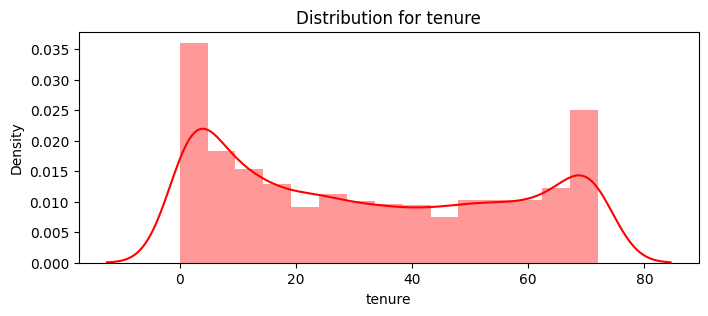

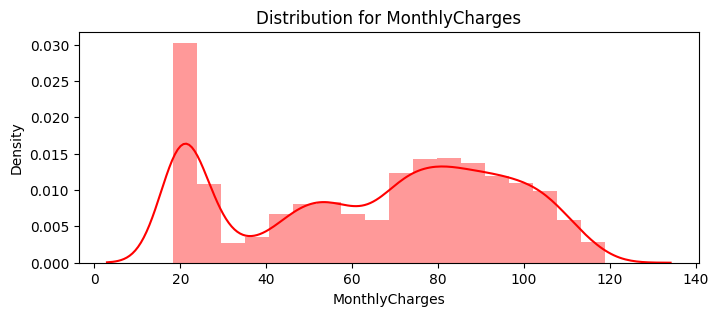

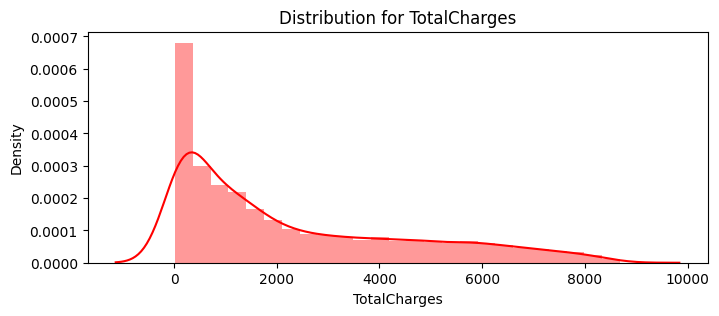

In [24]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)

Since the numerical features are distributed over different value ranges, I will use standard scalar to scale them down to the same range.

/tmp/ipykernel_21/3330901477.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(frame[feature], color= color)
/tmp/ipykernel_21/3330901477.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(frame[feature], color= color)
/tmp/ipykernel_21/3330901477.py:4: UserWarning: 

`distplot` is 

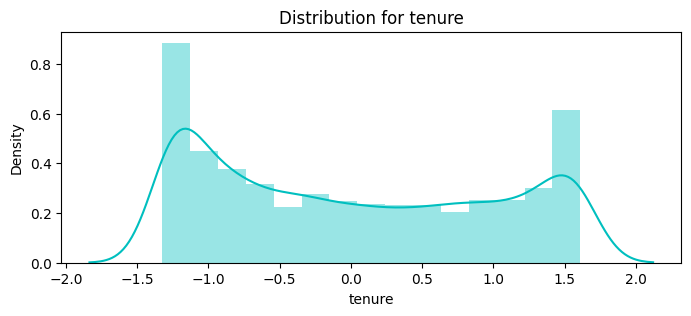

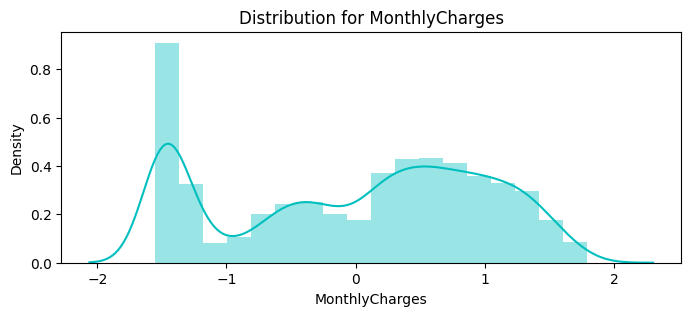

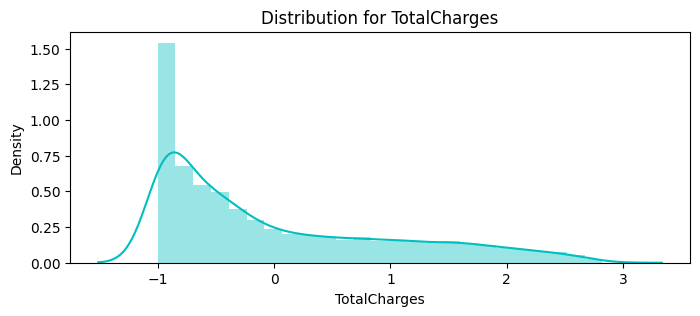

In [25]:
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype("float64")), columns = num_cols)

for feat in num_cols: distplot(feat, df_std, color = "c")

In [26]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,2,0,2,1,1,1,3,2,1,2,1,1,1,1,1,2,1,29.85,29.85,1
1,1,0,1,1,34,2,1,2,2,1,2,1,1,1,3,1,2,56.95,1889.50,1
2,1,0,1,1,2,2,1,2,2,2,1,1,1,1,1,2,2,53.85,108.15,2
3,1,0,1,1,45,1,3,2,2,1,2,2,1,1,3,1,3,42.30,1840.75,1
4,2,0,1,1,2,2,1,3,1,1,1,1,1,1,1,2,1,70.70,151.65,2


In [27]:
scaler = StandardScaler()

x_train[num_cols] = scaler.fit_transform(x_train[num_cols])

x_test[num_cols] = scaler.transform(x_test[num_cols])

In [28]:
x_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4114,2,0,2,2,0.761289,2,1,1,3,3,3,3,3,3,2,1,2,-1.485890,-0.550385
6469,1,0,1,1,0.109750,2,1,1,3,3,3,3,3,3,2,1,3,-1.436087,-0.693154
1614,1,0,2,1,1.412828,1,3,2,2,2,1,2,1,2,2,2,3,-0.456637,0.550504
4941,1,0,1,1,-1.193328,2,1,1,3,3,3,3,3,3,1,2,2,-1.490870,-0.979002
5995,1,0,2,2,1.616434,2,1,3,2,2,2,2,2,2,2,1,3,1.568666,2.542742


**Machine Learning Model Evaluations and Predictions**

**KNN**

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)
accuracy_knn = knn_model.score(x_test, y_test)
print("KNN accuracy:",accuracy_knn )

KNN accuracy: 0.7636449928808733


In [30]:
from sklearn import metrics

from sklearn.metrics import accuracy_score

from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.83      0.85      0.84      1569
           2       0.54      0.50      0.52       538

    accuracy                           0.76      2107
   macro avg       0.69      0.68      0.68      2107
weighted avg       0.76      0.76      0.76      2107



**SVC**

In [31]:
from sklearn.svm import SVC
svc_model = SVC(random_state = 1)
svc_model.fit(x_train, y_train)
y_pred = svc_model.predict(x_test)
accuracy_svc = svc_model.score(x_test, y_test)
print ("SVS accuracy: ",accuracy_svc )

SVS accuracy:  0.8068343616516374


In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.84      0.92      0.88      1569
           2       0.67      0.49      0.56       538

    accuracy                           0.81      2107
   macro avg       0.75      0.70      0.72      2107
weighted avg       0.79      0.81      0.80      2107

